In [1]:
#Import Necessary Liabraries for predection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# check the shape 
df.shape

(418, 12)

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
17,909,0,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
228,1120,0,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
68,960,0,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C


In [6]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
# understanding data using info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
# next step is check for an null values
# todo that we will use
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
# next step is check for an null values
# todo that we will use
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
# we can see that we have null values for age and cabin coulmn
# but we can see that more cabin has only around 85 data in that column
# so we will remove them because it is not going to contribute any information
df=df.drop(columns="Cabin", axis=1)

In [12]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
46,938,0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,C
316,1208,0,1,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,C
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C
245,1137,0,1,"Kenyon, Mr. Frederick R",male,41.0,1,0,17464,51.8625,S
158,1050,0,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,S


In [13]:
# let us an mathematical information on this dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [14]:
#EDA

In [15]:
df["Survived"].value_counts()

1    44
0    43
Name: Survived, dtype: int64

In [16]:
#checking for survived & non survived cases with countplot

In [17]:
sns.set()

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

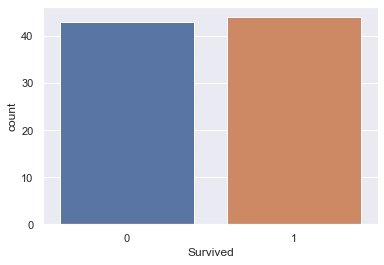

In [18]:
sns.countplot('Survived', data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

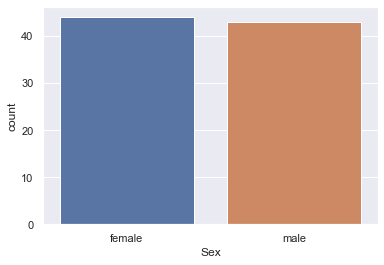

In [19]:
sns.countplot('Sex', data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

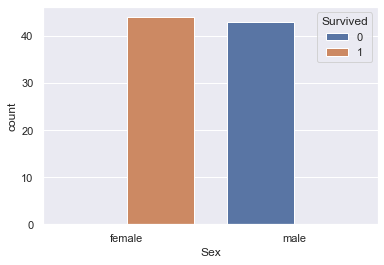

In [20]:
sns.countplot('Sex', hue="Survived", data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

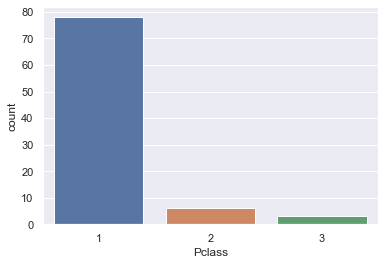

In [21]:
# cheking countplot for "Pclass" column
sns.countplot('Pclass', data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

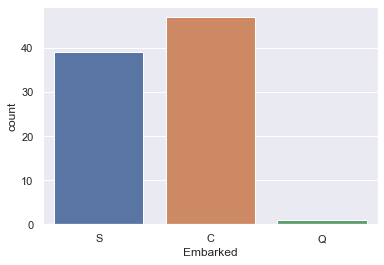

In [22]:
sns.countplot('Embarked', data=df)

In [23]:
# we can most of the people have started their journey from  (C).

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

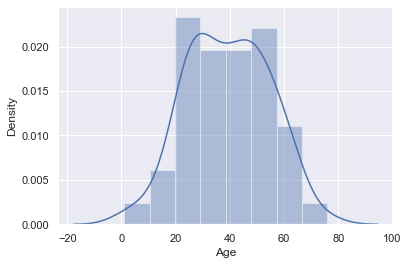

In [24]:
#checking for Age column
sns.distplot(df['Age'])

In [25]:
# form this graph we can understand that 20 to 50 people have travelling more

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

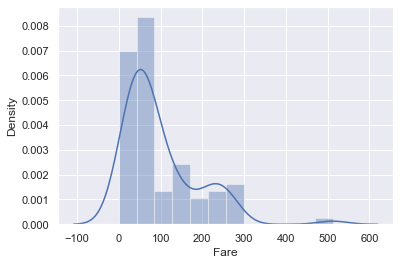

In [26]:
#checking for Fare column
sns.distplot(df['Fare'])

In [27]:
# here in above graph you can see the price is b/w 0 - 100 maximum..[fare:-the price paid by a passenger for their ticket]

<AxesSubplot:>

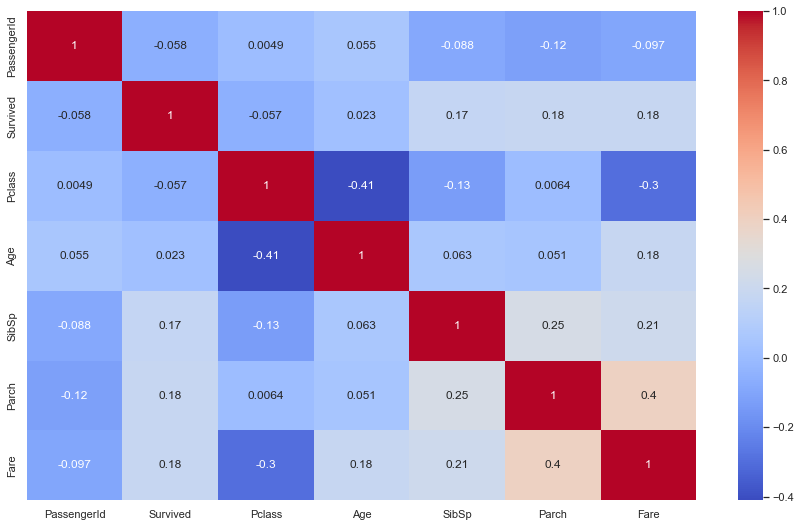

In [28]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [29]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
178,1070,1,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,S
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,C
73,965,0,1,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,C
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C


In [30]:
# In the above dataset we can observe that the name and ticket columns will not help in making prediction so we will remove that columns
df=df.drop(columns=['Name', 'Ticket'], axis=1)
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
109,1001,0,2,male,18.5,0,0,13.0000,S
118,1010,0,1,male,36.0,0,0,75.2417,C
100,992,1,1,female,43.0,1,0,55.4417,C
356,1248,1,1,female,59.0,2,0,51.4792,S
158,1050,0,1,male,42.0,0,0,26.5500,S


In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
239,1131,1,1,0,48.0,1,0,106.4250,0
321,1213,0,3,1,25.0,0,0,7.2292,0
343,1235,1,1,0,58.0,0,1,512.3292,0
156,1048,1,1,0,29.0,0,0,221.7792,2
405,1297,0,2,1,20.0,0,0,13.8625,0


In [32]:
X = df.drop(columns = ['PassengerId','Survived'],axis=1) # independent variable
Y = df['Survived']# dependent variable


In [33]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,0,23.0,1,0,82.2667,2
14,1,0,47.0,1,0,61.1750,2
24,1,0,48.0,1,3,262.3750,0
26,1,0,22.0,0,1,61.9792,0
28,1,1,41.0,0,0,30.5000,2
...,...,...,...,...,...,...,...
404,1,1,43.0,1,0,27.7208,0
405,2,1,20.0,0,0,13.8625,0
407,1,1,50.0,1,1,211.5000,0
411,1,0,37.0,1,0,90.0000,1


In [34]:
Y

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 87, dtype: int64

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [36]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
391,1,0,51.0,0,1,39.4000,2
14,1,0,47.0,1,0,61.1750,2
75,1,1,32.5,0,0,211.5000,0
407,1,1,50.0,1,1,211.5000,0
390,1,1,23.0,0,0,93.5000,2
...,...,...,...,...,...,...,...
202,1,1,47.0,1,0,227.5250,0
96,1,0,76.0,1,0,78.8500,2
364,1,0,25.0,1,0,55.4417,0
69,1,0,60.0,1,4,263.0000,2


In [37]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
208,1,0,33.0,0,0,27.7208,0
166,1,1,48.0,0,0,50.4958,0
404,1,1,43.0,1,0,27.7208,0
12,1,0,23.0,1,0,82.2667,2
57,3,1,25.0,0,0,7.6500,2
68,1,1,31.0,0,0,28.5375,0
270,1,1,46.0,0,0,75.2417,0
316,1,1,57.0,1,0,146.5208,0
245,1,1,41.0,1,0,51.8625,2
397,1,0,48.0,1,1,79.2000,0


In [38]:
X_test.shape

(18, 7)

In [39]:
X.shape# actual dataset number of rows and columns

(87, 7)

In [40]:
# importing the logistic regression from sklearn.linear_model and imported accuray_score from metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
# creating an object for the LogisticRegression class

model = LogisticRegression()

In [42]:

df.astype({'Age': np.int16, 'Fare': np.int16}).dtypes


PassengerId    int64
Survived       int64
Pclass         int64
Sex            int32
Age            int16
SibSp          int64
Parch          int64
Fare           int16
Embarked       int32
dtype: object

In [43]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [46]:
print(X_train_prediction)

[1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1]


In [47]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  1.0


In [48]:

# accuracy on test data
X_test_prediction = model.predict(X_test)

In [49]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy_score_of_test data : ', test_data_accuracy)

Accuracy_score_of_test data :  1.0
